<a href="https://colab.research.google.com/github/pulavartivinay/Face_Mask_Detection/blob/retinaNet/retinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# start

In [3]:
# installs
!pip3 install retinaface &> /dev/null

In [4]:
# imports
import os
import random
import cv2 
from retinaface import RetinaFace
from google.colab.patches import cv2_imshow
import glob
import itertools

In [5]:
# loading dataset -- this might take a while to run for the first time, around 2min
# https://github.com/X-zhangyang/Real-World-Masked-Face-Dataset

!gdown --id 1mNZ5eaoT9A0LdXLFZcE4lFeM9X6X7Cjt #loading the dataset from google drive link to colab
!unzip /content/rwmfd.zip &> /dev/null #unzipping
!rm -rf /content/rwmfd.zip &> /dev/null #deleting the zip file
!rm -rf __MACOSX &> /dev/null

Downloading...
From: https://drive.google.com/uc?id=1mNZ5eaoT9A0LdXLFZcE4lFeM9X6X7Cjt
To: /content/rwmfd.zip
157MB [00:01, 147MB/s]


In [6]:
# pre processing the dataset
# https://stackoverflow.com/questions/18394147/recursive-sub-folder-search-and-return-files-in-a-list-python
# https://stackoverflow.com/questions/11574195/how-to-merge-multiple-lists-into-one-list-in-python

def generate_image_paths(dir_path):
  files_jpg = glob.glob(dir_path + '/**/*.jpg', recursive=True)
  files_jpeg = glob.glob(dir_path + '/**/*.jpeg', recursive=True)
  files_png = glob.glob(dir_path + '/**/*.png', recursive=True)
  files_webp = glob.glob(dir_path + '/**/*.webp', recursive=True)
  files_jfif = glob.glob(dir_path + '/**/*.jfif', recursive=True)
  paths = list(itertools.chain(files_jpg, files_jpeg, files_png, files_webp, files_jfif))
  return paths

dataset_path = "/content/rwmfd"
paths = generate_image_paths(dataset_path)

print(len(paths))

4194


In [7]:
# retinaNet model, retinaFace for Face Detection
# https://pypi.org/project/retinaface/

def retinaFace_detector(image_path, detector):
  image = detector.read(image_path)
  faces = detector.predict(image)
  return faces

In [8]:
# openCV image cropping function
# https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

def openCV_image_cropping(image_path, face):
  img = cv2.imread(image_path)
  crop_img = img[face[2]:face[3], face[0]:face[1]]
  return crop_img

model[normal quality] init ..
model success !


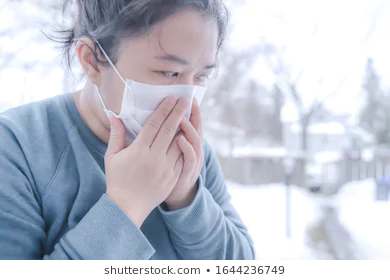

[{'x1': 110, 'y1': 12, 'x2': 217, 'y2': 155, 'left_eye': (166, 74), 'right_eye': (203, 81), 'nose': (194, 107), 'left_lip': (158, 121), 'right_lip': (187, 129)}]


In [9]:
# passing random image from the dataset through retinaNet Face Detection model and visualising the output

detector = RetinaFace(quality='normal')
random_image_path = random.choice(paths)
random_image = cv2.imread(random_image_path)
cv2_imshow(random_image)
faces = retinaFace_detector(random_image_path, detector)
print(faces)

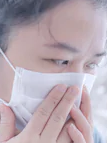

In [12]:
# passing random image face detection output of retinaNet Face Detection model to openCV image cropping function and visualising the image
if(len(faces)>0):
  for face in faces:
      cropped_face = openCV_image_cropping(random_image_path, (face["x1"], face["x2"], face["y1"], face["y2"]))
      cv2_imshow(cropped_face)

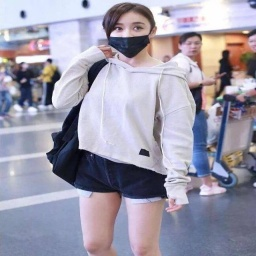

(109, 148, 10, 55)


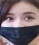

(184, 200, 36, 56)


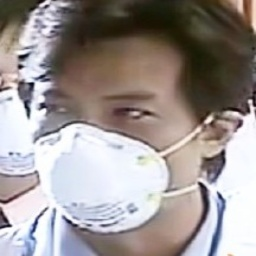

(35, 175, 44, 212)


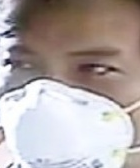

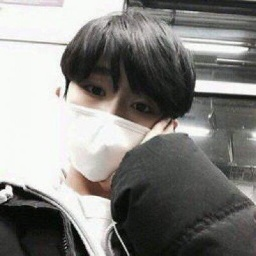

(53, 174, 42, 186)


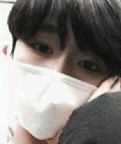

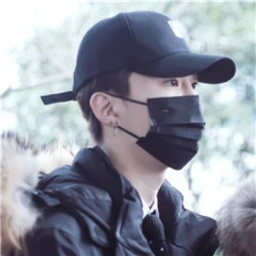

(132, 198, 58, 131)


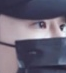

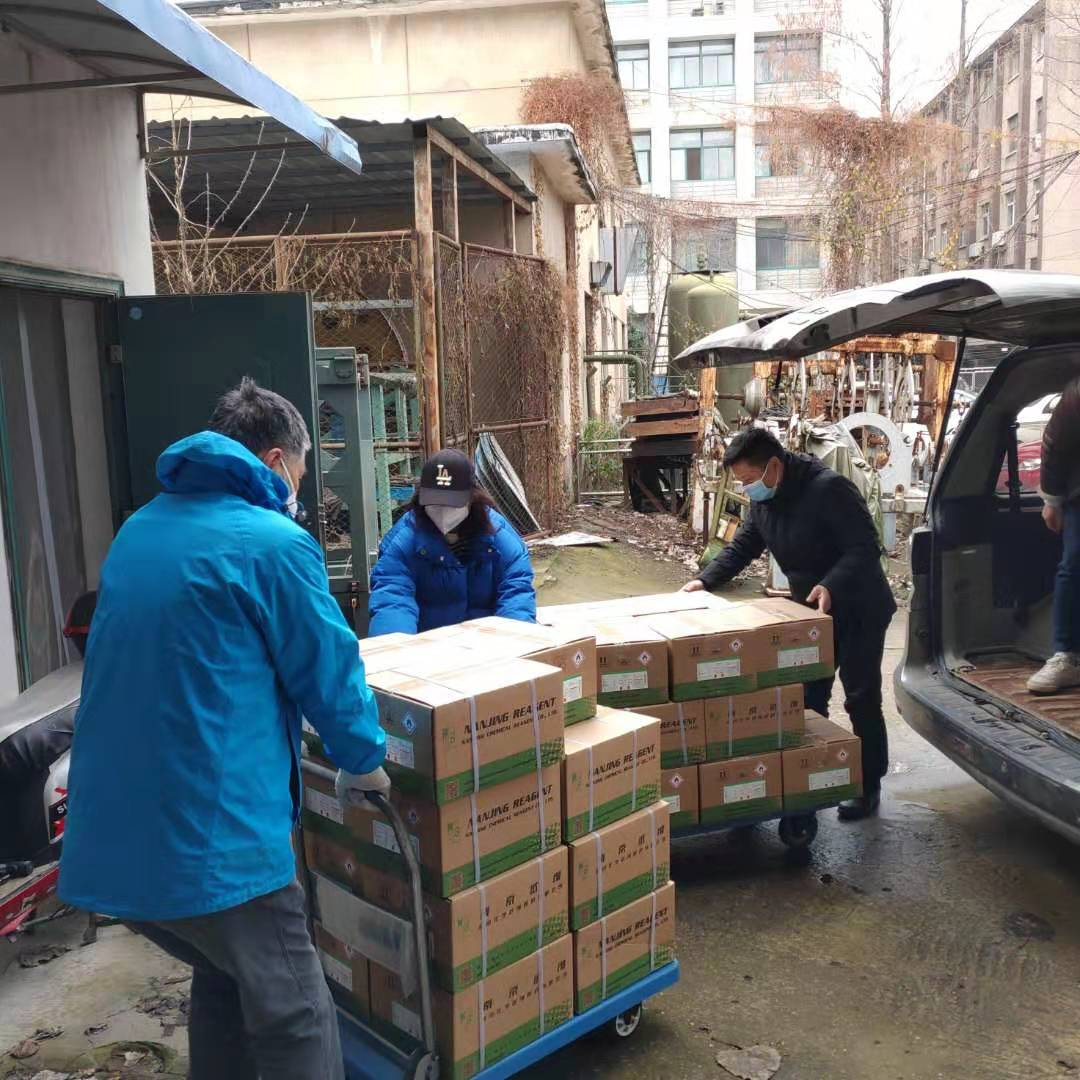

(729, 774, 461, 506)


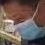

(424, 467, 490, 535)


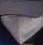

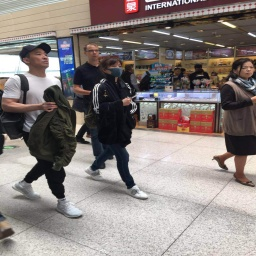

(30, 48, 46, 68)


(87, 98, 46, 60)


(241, 253, 61, 77)


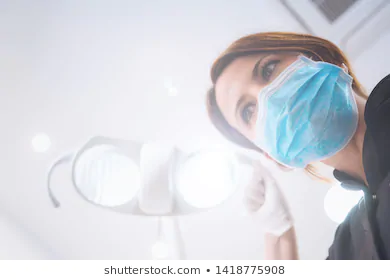

(210, 336, 44, 158)


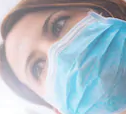

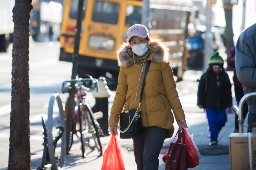

(129, 147, 34, 55)


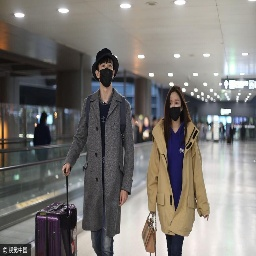

(97, 115, 59, 80)


(166, 182, 92, 117)


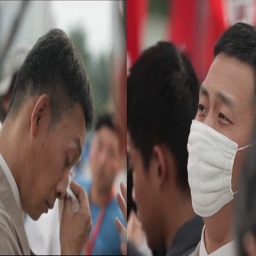

(10, 84, 100, 228)


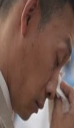

(173, 252, 71, 192)


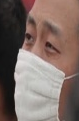

(118, 178, 114, 246)


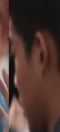

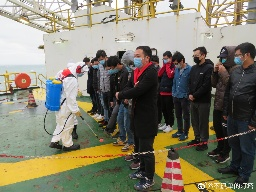

(193, 201, 50, 61)


(235, 245, 49, 64)


(134, 145, 50, 65)


(173, 181, 59, 68)


(163, 170, 55, 64)


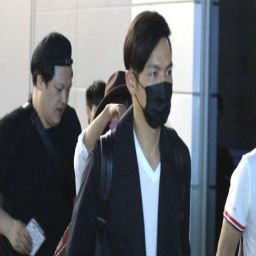

(39, 72, 66, 124)


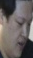

(135, 175, 43, 113)


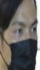

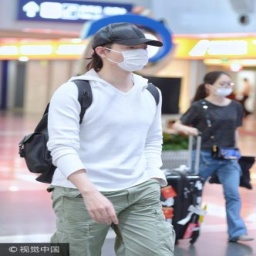

(212, 230, 75, 97)


(112, 144, 37, 70)


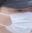

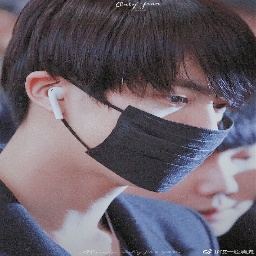

(128, 244, 43, 201)


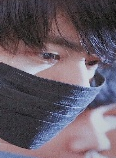

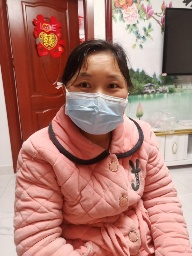

(65, 126, 53, 133)


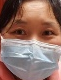

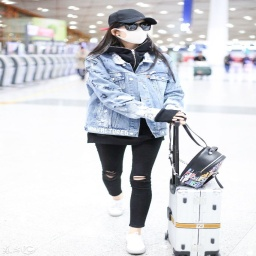

(120, 147, 17, 45)


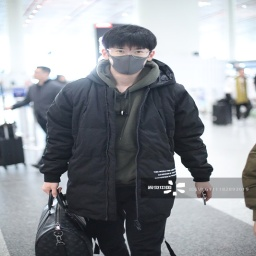

(109, 147, 37, 78)


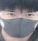

(34, 43, 68, 79)


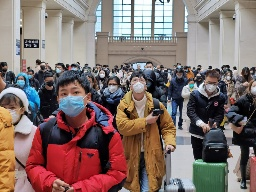

(57, 86, 81, 115)


(108, 117, 80, 91)


(205, 217, 78, 91)


(56, 62, 65, 71)


(0, 20, 98, 123)


(131, 144, 76, 90)


18

In [13]:
# passing some images from the dataset through retinaNet Face Detection model and openCV image cropping function (no visualisation)
detected_faces = {}

random.shuffle(paths)

# size set to 20 random images, make sure to change this while working on problem statement
for image_path in paths[:20]:
  faces = retinaFace_detector(image_path, detector)
  if(len(faces)>0):
    for face in faces:
        detected_faces.setdefault(image_path, []).append((face["x1"], face["x2"], face["y1"], face["y2"]))

for (image_path, faces) in detected_faces.items():
  cv2_imshow(cv2.imread(image_path))
  for face in faces:
    print(face)
    cropped_face = openCV_image_cropping(image_path, face)
    cv2_imshow(cropped_face)

len(detected_faces)